### NYC AIRBNB STORY-TELLING WITH EDA

![Alt Text](2.png)

Since we know EDA is the most crucial step before building a ML model or performing any text classification, I've laid out a detailed explanation in an easy-to-understand manner, highlighting the essence of data exploration with intriguing insights!

Airbnb Overview:

Airbnb is an online marketplace for arranging or offering lodging, primarily homestays or tourism experiences. It acts as a broker, earning commissions from each booking without owning any real estate listings or hosting events. The company is headquartered in San Francisco, California, United States.

The idea for Airbnb was born when its founders placed an air mattress in their living room to convert their apartment into a bed and breakfast, aiming to offset the high cost of rent in San Francisco. Airbnb is a shortened version of its original name, AirBedandBreakfast.com.

NYC Airbnb Insights:

Let's delve into the vibrant and dynamic Airbnb market in New York City. NYC is one of the most popular destinations for Airbnb, offering a unique mix of diverse neighborhoods, iconic landmarks, and cultural experiences. The city's Airbnb listings range from cozy apartments in Manhattan to charming brownstones in Brooklyn, catering to various preferences and budgets.

Through detailed exploratory data analysis (EDA), we can uncover fascinating trends and insights about NYC Airbnb listings, including occupancy rates, pricing strategies, and guest preferences. Understanding these patterns helps hosts optimize their offerings and enhances the guest experience, contributing to the continuous growth of the Airbnb community in New York City.

### 1. Importing Libraries & Reading The Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
airbnb = pd.read_csv("AB_NYC_2019.csv")
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


### 2. Data Exploration & Variable Identification

In [3]:
#checking what are the variables here:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [4]:
#basic information about the dataset
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
#looks all the property ids are different and each listings are different here!
airbnb['id'].nunique()

48895

#### So what are the numerical and categorical variables?

Categorical Variables:

host_name: Each property is associated with a single host, but a host can have multiple properties.
neighbourhood_group, neighbourhood, room_type: These categories classify listings based on their location and type.

Numerical Variables:

id, latitude, longitude: Identifiers and geographic coordinates of the properties.
price, minimum_nights, number_of_reviews, last_review, reviews_per_month: Financial and review metrics.
calculated_host_listings_count, availability_365: Metrics indicating the number of listings a host has and the availability of the property throughout the year.

In [6]:
airbnb['neighbourhood'].nunique() #looks this can be a categorical var too. lets check as well

221

In [7]:
airbnb['host_name'].nunique() #unique hosts

11452

In [8]:
airbnb['name'].nunique() #unique listings

47896

In [9]:
#top 5 listings on Airbnb in entire NYC:

listings_count_airbnb=airbnb['name'].value_counts()[:5].reset_index()
listings_count_airbnb.rename(columns={'index':'Listings on Airbnb','name':'Total_listings'},inplace=True)
listings_count_airbnb

,Listings on Airbnb,Total_listings
0,Hillside Hotel,18
1,Home away from home,17
2,New york Multi-unit building,16
3,Brooklyn Apartment,12
4,Loft Suite @ The Box House Hotel,11


In [10]:
airbnb[airbnb['name']==airbnb['host_name']] #looks there are few listings where the property name and the host have same names!
#we can remove duplicates later in our analysis!

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9473,7264659,Olivier,6994503,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200,5,12,30-01-2018,0.25,1,25
10682,8212051,Monty,43302952,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95,2,7,30-10-2015,0.15,1,238
16422,13186374,Sean,35143476,Sean,Brooklyn,Windsor Terrace,40.65182,-73.98043,Entire home/apt,400,7,0,NaN,NaN,1,0
23996,19348168,Cyn,74033595,Cyn,Brooklyn,Bedford-Stuyvesant,40.67850,-73.91478,Private room,75,2,1,10-09-2018,0.10,1,0
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,23-07-2017,0.08,18,90
24607,19785737,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,08-10-2017,0.05,18,180
26734,21231543,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,NaN,NaN,18,365
26752,21243952,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70288,-73.81531,Private room,135,1,1,02-01-2018,0.05,18,365
26753,21244035,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70319,-73.81410,Private room,135,1,2,10-06-2018,0.09,18,365
26889,21311903,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70258,-73.81510,Private room,135,1,0,NaN,NaN,18,365


In [11]:
airbnb['host_id'].value_counts()[:4] #host ids with most listings counts

219517861    327
107434423    232
30283594     121
137358866    103
Name: host_id, dtype: int64

### Key Observations on Host & Property Relationships

During my analysis of the variables name and host_name, and their relationship with neighbourhood_group and neighbourhood, I discovered the following:

A single host can have multiple properties within a neighbourhood group, each potentially with different host IDs.
Typically, a host with a specific property or listing in a particular neighbourhood within a neighbourhood group will have the same host ID. However, there are exceptions where hosts use different IDs for each listing or property within the same neighbourhood.

The data also indicates instances where a host may co-host another person’s property or listing within a neighbourhood on Airbnb.

Although these observations provide interesting insights, they are not critical for our analysis, so we will proceed without focusing on these exceptions.

In [12]:
airbnb.describe() #getting the overall summary statistics for all numerical columns

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Looks there are some property listed with 0 listed price!

In [13]:
len(airbnb[airbnb['price']==0]) #so 11 property/listings have 0 price listed.

11

When booking a listing for stay or rent, a person typically considers the following key factors:

1) Property Details: name, host_name
2) Location: neighbourhood_group, neighbourhood
3) Accommodation Type: room_type
4) Cost and Duration: price, minimum_nights
5) Reputation: number_of_reviews

These elements are crucial for our analysis, although we will verify this selection at the end.

### 3. Creating Features
By categorizing, we are able to better understand relationships and connections between things and better communicate our findings.

### 3.1 Categorizing The "availability_365" Column Into 5 Categories

In [14]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [15]:
def availability_365_categories_function(row):
    """
    Categorizes the "minimum_nights" column into 5 categories
    """
    if row <= 1:
        return 'very Low'
    elif row <= 100:
        return 'Low'
    elif row <= 200 :
        return 'Medium'
    elif (row <= 300):
        return 'High'
    else:
        return 'very High'

In [16]:
airbnb['availability_365_categories'] = airbnb.availability_365.map(availability_365_categories_function)
airbnb['availability_365_categories']

0        very High
1        very High
2        very High
3           Medium
4         very Low
           ...    
48890          Low
48891          Low
48892          Low
48893          Low
48894          Low
Name: availability_365_categories, Length: 48895, dtype: object

In [17]:
airbnb['availability_365_categories'].value_counts()

very Low     17941
Low          11829
very High     8108
Medium        5792
High          5225
Name: availability_365_categories, dtype: int64

### 3.2 Categorizing The "minimum_nights" Column Into 5 Categories

In [18]:
def minimum_night_categories_function(row):
    """
    Categorizes the "minimum_nights" column into 5 categories
    """
    if row <= 1:
        return 'very Low'
    elif row <= 3:
        return 'Low'
    elif row <= 5 :
        return 'Medium'
    elif (row <= 7):
        return 'High'
    else:
        return 'very High'

In [19]:
# testing the function
print(minimum_night_categories_function(7))
print(minimum_night_categories_function(1))
print(minimum_night_categories_function(0))
print(minimum_night_categories_function(-1))

High
very Low
very Low
very Low


In [20]:
airbnb['minimum_night_categories'] = airbnb.minimum_nights.map(minimum_night_categories_function)
airbnb['minimum_night_categories']

0         very Low
1         very Low
2              Low
3         very Low
4        very High
           ...    
48890          Low
48891       Medium
48892    very High
48893     very Low
48894         High
Name: minimum_night_categories, Length: 48895, dtype: object

In [21]:
airbnb.minimum_night_categories.value_counts()

Low          19695
very Low     12720
very High     7333
Medium        6337
High          2810
Name: minimum_night_categories, dtype: int64

### 3.3 Categorizing The "number_of_reviews" Column Into 5 Categories

In [22]:
def number_of_reviews_categories_function(row):
    """
    Categorizes the "number_of_reviews" column into 5 categories
    """
    if row <= 1:
        return 'very Low'
    elif row <= 5:
        return 'Low'
    elif row <= 10 :
        return 'Medium'
    elif (row <= 30):
        return 'High'
    else:
        return 'very High'

In [23]:
airbnb['number_of_reviews_categories'] = airbnb.minimum_nights.map(number_of_reviews_categories_function)
airbnb['number_of_reviews_categories']

0        very Low
1        very Low
2             Low
3        very Low
4          Medium
           ...   
48890         Low
48891         Low
48892      Medium
48893    very Low
48894      Medium
Name: number_of_reviews_categories, Length: 48895, dtype: object

### 3.4 Categorizing The "price" Column Into 5 Categories

In [24]:
airbnb.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

<AxesSubplot:>

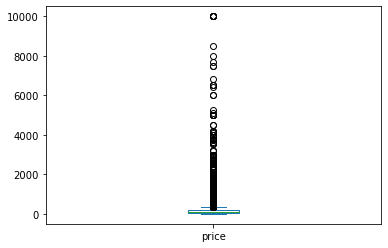

In [25]:
airbnb.price.plot.box()

In [26]:
airbnb[airbnb.price == 0].shape

(11, 19)

In [27]:
def price_categories_function(row):
    """
    Categorizes the "number_of_reviews" column into 5 categories
    """
    if row <= 1:
        return 'very Low'
    elif row <= 4:
        return 'Low'
    elif row <= 15 :
        return 'Medium'
    elif (row <= 100):
        return 'High'
    else:
        return 'very High'

In [28]:
airbnb['price_categories'] = airbnb.minimum_nights.map(price_categories_function)
airbnb['price_categories']

0        very Low
1        very Low
2             Low
3        very Low
4          Medium
           ...   
48890         Low
48891         Low
48892      Medium
48893    very Low
48894      Medium
Name: price_categories, Length: 48895, dtype: object

### 4. Fixing columns

In [29]:
# To see Non-Null counts and data types
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [30]:
airbnb.last_review = pd.to_datetime(airbnb.last_review)
airbnb.last_review

0       2018-10-19
1       2019-05-21
2              NaT
3       2019-05-07
4       2018-11-19
           ...    
48890          NaT
48891          NaT
48892          NaT
48893          NaT
48894          NaT
Name: last_review, Length: 48895, dtype: datetime64[ns]

In [31]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'availability_365_categories',
       'minimum_night_categories', 'number_of_reviews_categories',
       'price_categories'],
      dtype='object')

There are no more Dtypes to be fixed and data does not contain inconsistencies such as shifted columns, which is need to align correctly.The columns necessery for the futher analysis are also derived.

### 5. Data Types

### 5.1 Categorical

In [32]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'availability_365_categories',
       'minimum_night_categories', 'number_of_reviews_categories',
       'price_categories'],
      dtype='object')

In [33]:
# Categorical 
categorical_columns = airbnb.columns[[0,1,3,4,5,8,16,17,18,19]]
categorical_columns

Index(['id', 'name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'availability_365_categories', 'minimum_night_categories',
       'number_of_reviews_categories', 'price_categories'],
      dtype='object')

In [34]:
# To see the first few rows of categorical columns
airbnb[categorical_columns].head()

,id,name,host_name,neighbourhood_group,neighbourhood,room_type,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,2539,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,very High,very Low,very Low,very Low
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,very High,very Low,very Low,very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,very High,Low,Low,Low
3,3831,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,Medium,very Low,very Low,very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,very Low,very High,Medium,Medium


### 5.2 Numerical

In [35]:
numerical_columns = airbnb.columns[[9,10,11,13,14,15]]
numerical_columns

Index(['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [36]:
airbnb[numerical_columns].head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,149,1,9,0.21,6,365
1,225,1,45,0.38,2,355
2,150,3,0,NaN,1,365
3,89,1,270,4.64,1,194
4,80,10,9,0.10,1,0


In [37]:
airbnb[numerical_columns].describe()      

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### 5.3 Coordinates & Date

In [38]:
coordinates = airbnb.columns[[5,6,12]]
airbnb[coordinates]

,neighbourhood,latitude,last_review
0,Kensington,40.64749,2018-10-19
1,Midtown,40.75362,2019-05-21
2,Harlem,40.80902,NaT
3,Clinton Hill,40.68514,2019-05-07
4,East Harlem,40.79851,2018-11-19
...,...,...,...
48890,Bedford-Stuyvesant,40.67853,NaT
48891,Bushwick,40.70184,NaT
48892,Harlem,40.81475,NaT
48893,Hell's Kitchen,40.75751,NaT


### 6. Missing Values

In [39]:
# To see the number of missing values
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
availability_365_categories           0
minimum_night_categories              0
number_of_reviews_categories          0
price_categories                      0
dtype: int64

In [40]:
# Percentage of missing values
round((airbnb.isnull().sum()/len(airbnb))*100,2)

id                                 0.00
name                               0.03
host_id                            0.00
host_name                          0.04
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       20.56
reviews_per_month                 20.56
calculated_host_listings_count     0.00
availability_365                   0.00
availability_365_categories        0.00
minimum_night_categories           0.00
number_of_reviews_categories       0.00
price_categories                   0.00
dtype: float64

Two columns, last_review and reviews_per_month, have approximately 20.56% missing values. Additionally, name and host_name have 0.3% and 0.4% missing values, respectively.

MCAR (Missing Completely at Random): The missing values occur independently of any other features.

MNAR (Missing Not at Random): The missing values have a specific reason or pattern behind them.

Since our goal is to analyze the dataset rather than build a model, we won't be dropping or imputing columns. Most features are essential for our analysis.

### 6.1 Missing Values Analysis

In [41]:
# Selecting the data with missing values for 'last_review' feature
airbnb1 = airbnb.loc[airbnb.last_review.isnull(),:]
airbnb1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,very High,Low,Low,Low
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,NaN,2,249,High,High,Medium,Medium
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,1,0,very Low,Medium,Low,Low
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaT,NaN,1,365,very High,very High,very High,High
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaT,NaN,1,365,very High,very Low,very Low,very Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9,Low,Low,Low,Low
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36,Low,Medium,Low,Low
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27,Low,very High,Medium,Medium
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2,Low,very Low,very Low,very Low


### 6.2 Missing Values Analysis ('neighbourhood_group' feature)

In [42]:
# Count of 'neighbourhood_group' with missing values
airbnb1.groupby('neighbourhood_group').neighbourhood_group.count()

neighbourhood_group
Bronx             215
Brooklyn         3657
Manhattan        5029
Queens           1092
Staten Island      59
Name: neighbourhood_group, dtype: int64

In [43]:
# Count of 'neighbourhood_group'
airbnb.groupby('neighbourhood_group').neighbourhood_group.count()

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [44]:
(airbnb1.groupby('neighbourhood_group').neighbourhood_group.count()/airbnb.groupby('neighbourhood_group').neighbourhood_group.count())*100

neighbourhood_group
Bronx            19.706691
Brooklyn         18.190410
Manhattan        23.216841
Queens           19.272856
Staten Island    15.817694
Name: neighbourhood_group, dtype: float64

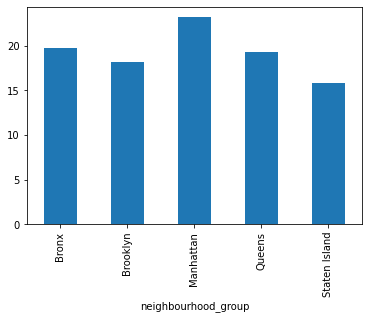

In [45]:
((airbnb1.groupby('neighbourhood_group').neighbourhood_group.count()/airbnb.groupby('neighbourhood_group').neighbourhood_group.count())*100).plot.bar()
plt.show()

In [46]:
((airbnb1.groupby('neighbourhood_group').neighbourhood_group.count()/airbnb.groupby('neighbourhood_group').neighbourhood_group.count())*100).mean()

19.240898461107257

Each neighbourhood_group has about 19 % missing values in 'last_review' feature.

In [47]:
airbnb1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,very High,Low,Low,Low
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,NaN,2,249,High,High,Medium,Medium
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,1,0,very Low,Medium,Low,Low
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaT,NaN,1,365,very High,very High,very High,High
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaT,NaN,1,365,very High,very Low,very Low,very Low


### 6.3 Missing Values Analysis ('room_type' feature)

In [48]:
# Count of 'room_type' with missing values
airbnb2 = (airbnb1.groupby('room_type').room_type.count()/airbnb.groupby('room_type').room_type.count())*100
airbnb2

room_type
Entire home/apt    19.981109
Private room       20.877004
Shared room        27.068966
Name: room_type, dtype: float64

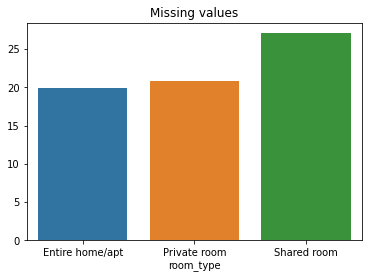

In [49]:
plt.title('Missing values')
sns.barplot(x = airbnb2.index, y = airbnb2.values)
plt.show()

'Shared room' has the highest missing value percentage (27 %) for 'last_review' feature while to other room types has only about 20 %.

In [50]:
print('Mean and Median of prices with last_review feature missing')
print('Mean   = ', airbnb[airbnb['last_review'].isnull()].price.mean())
print('Median = ', airbnb[airbnb['last_review'].isnull()].price.median())

print('\nMean and Median of prices with last_review feature not missing')
print('Mean   = ', airbnb[airbnb['last_review'].notnull()].price.mean())
print('Median = ', airbnb[airbnb['last_review'].notnull()].price.median())

Mean and Median of prices with last_review feature missing
Mean   =  192.9190210903303
Median =  120.0

Mean and Median of prices with last_review feature not missing
Mean   =  142.317946605566
Median =  101.0


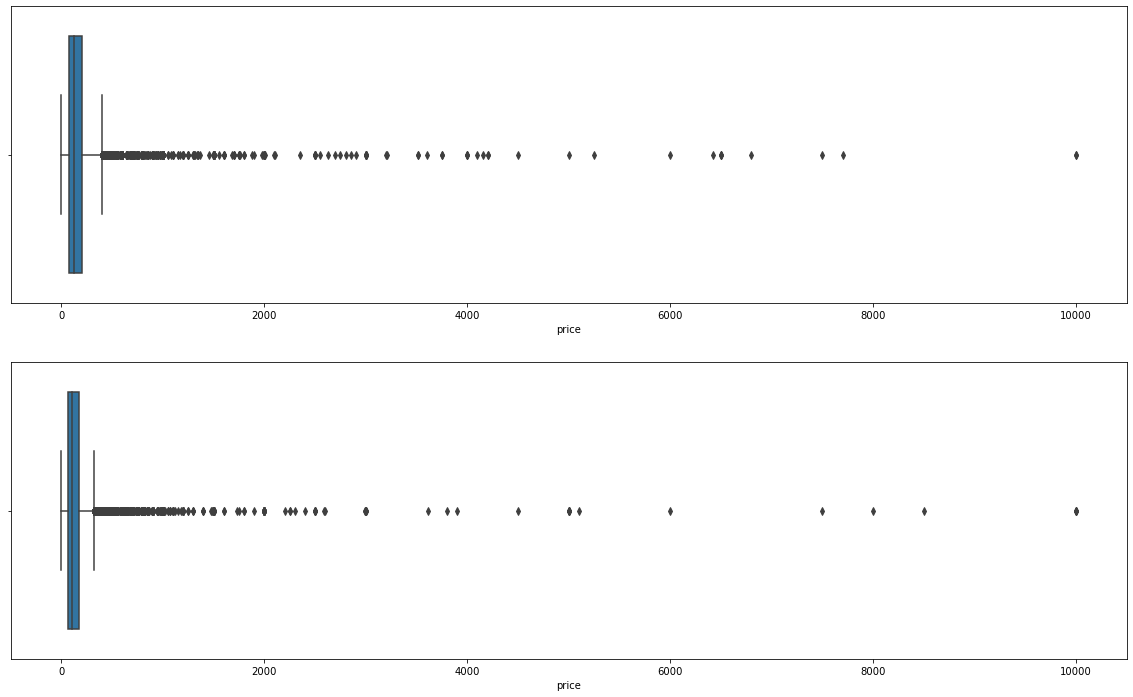

In [51]:
plt.figure(figsize=(20,12))

plt.subplot(2,1,1)
sns.boxplot(data = airbnb[airbnb['last_review'].isnull()] , x = 'price',  width= .8)

plt.subplot(2,1,2)
sns.boxplot(data = airbnb[airbnb['last_review'].notnull()] , x = 'price',  width= .8)

plt.show()

Detailed Analysis of Missing Values:

    1) Higher Pricing with Missing 'last_review':
        Observations indicate that listings without a 'last_review' tend to have higher prices.

    2)Lower Review Frequency for Shared Rooms:
        Shared rooms are less likely to receive reviews compared to other room types.

    3)High Prices Correlate with Fewer Reviews:
        Listings with higher prices tend to have fewer reviews, suggesting that guests may be less inclined to 
        leave feedback for more expensive stays.
        
Note : 
    The patterns observed suggest that the missing values in the 'last_review' and 'reviews_per_month' columns
    are not Missing Completely at Random (MCAR).

### 7. Univariate Analysis

In [52]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,very High,very Low,very Low,very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,very High,very Low,very Low,very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,very High,Low,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-05-07,4.64,1,194,Medium,very Low,very Low,very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,very Low,very High,Medium,Medium


### 7.1 name

In [53]:
airbnb.name.value_counts()

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Brownstone garden 2 bedroom duplex, Central Park       1
Bright Cozy Private Room near Columbia Univ            1
1 bdrm/large studio in a great location                1
Cozy Private Room #2 Two Beds Near JFK and J Train     1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47896, dtype: int64

### 7.2 host_id

In [54]:
airbnb.host_id.value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64

### 7.3 host_name

In [55]:
airbnb.host_name.value_counts()

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

In [56]:
airbnb.host_name.value_counts().index[:10]

Index(['Michael', 'David', 'Sonder (NYC)', 'John', 'Alex', 'Blueground',
       'Sarah', 'Daniel', 'Jessica', 'Maria'],
      dtype='object')

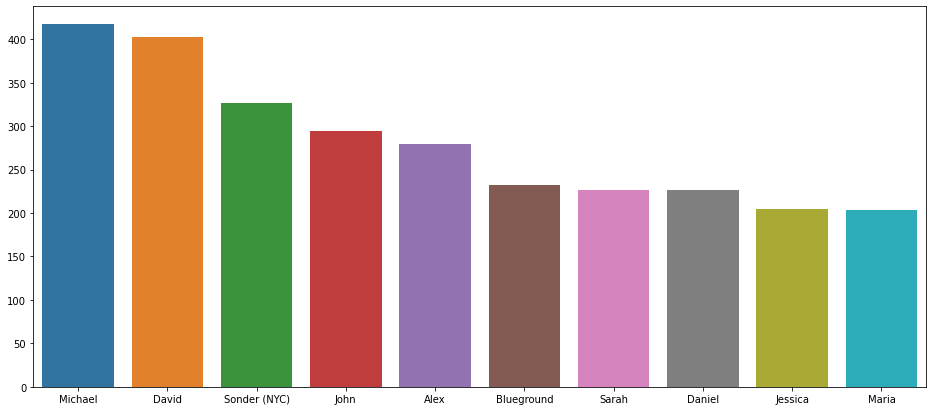

In [57]:
# Top 10 host's
plt.figure(figsize=(16,7))
sns.barplot(x = airbnb.host_name.value_counts().index[:10] , y = airbnb.host_name.value_counts().values[:10])
plt.show()

### 7.4 neighbourhood_group

In [58]:
airbnb.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [59]:
airbnb.neighbourhood_group.value_counts(normalize= True) * 100

Manhattan        44.301053
Brooklyn         41.116679
Queens           11.588097
Bronx             2.231312
Staten Island     0.762859
Name: neighbourhood_group, dtype: float64

In [60]:
airbnb['neighbourhood'].unique() #looking at the unique neighbourhoods

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

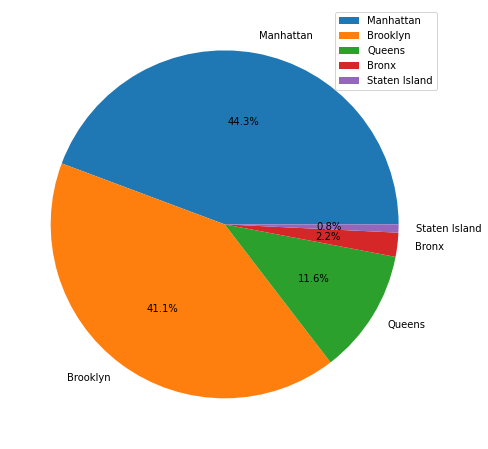

In [61]:
plt.figure(figsize=(8,8))
plt.pie(x = airbnb.neighbourhood_group.value_counts(normalize= True) * 100,labels = airbnb.neighbourhood_group.value_counts(normalize= True).index,autopct='%1.1f%%')
plt.legend()
plt.show()

The image provides the percentages of listings in different neighbourhood groups in NYC, with the highest percentages being Manhattan (44.3%) and Brooklyn (41.1%), which together account for 85.4% of the listings. Here are some key points about this observation:

Popularity: Manhattan and Brooklyn are the most popular areas for Airbnb listings, likely due to their central locations and vibrant neighborhoods.

Demand: High demand for accommodation in these areas is driven by their cultural attractions, business centers, and tourist spots.

Diverse Options: These neighborhoods offer a diverse range of properties, from luxury apartments in Manhattan to charming brownstones in Brooklyn, catering to various preferences and budgets.

Accessibility: Both Manhattan and Brooklyn are well-connected by public transportation, making them convenient for visitors.

These factors contribute to the high concentration of Airbnb listings in Manhattan and Brooklyn.

### 7.5 neighbourhood

In [62]:
airbnb.neighbourhood.value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [63]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,very High,very Low,very Low,very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,very High,very Low,very Low,very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,very High,Low,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-05-07,4.64,1,194,Medium,very Low,very Low,very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,very Low,very High,Medium,Medium


### 7.6 room_type

In [64]:
airbnb.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [65]:
airbnb.room_type.value_counts(normalize=True)*100

Entire home/apt    51.966459
Private room       45.661111
Shared room         2.372431
Name: room_type, dtype: float64

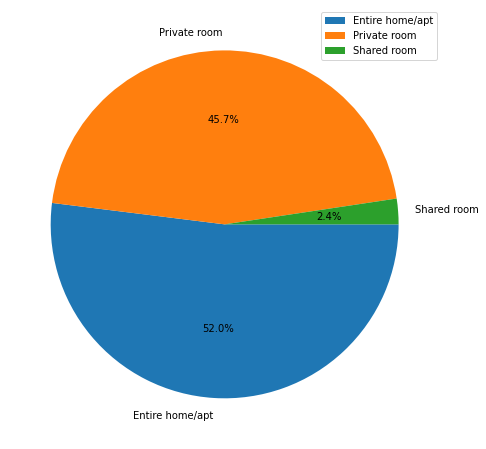

In [66]:
plt.figure(figsize=(8, 8))
plt.pie(
    x=airbnb.room_type.value_counts(normalize=True) * 100,
    labels=airbnb.room_type.value_counts(normalize=True).index,
    counterclock=False,
    autopct='%1.1f%%'
)
plt.legend()
plt.show()

### The pie chart shows the distribution of room types for Airbnb listings, with the following observations:

Entire Home/Apt (52.0%):
Over half of the listings are for entire homes or apartments, indicating a strong preference among guests for complete privacy and full control over the living space.

Private Room (45.7%):
A significant portion of the listings are for private rooms, which offer guests a balance between affordability and some level of privacy while sharing common areas with the host or other guests.

Shared Room (2.4%):
Shared rooms make up a small fraction of the listings, suggesting lower demand for this type of accommodation, which offers the least privacy and shared sleeping spaces.
These insights highlight the varying preferences of guests when booking Airbnb accommodations, with a notable inclination towards more private and self-contained living arrangements.

### 7.7 price

In [67]:
airbnb.price.value_counts()

100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: price, Length: 674, dtype: int64

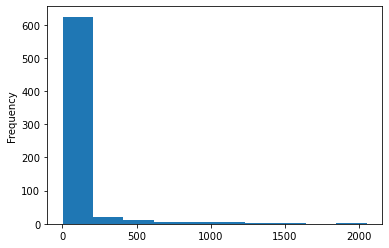

In [68]:
airbnb.price.value_counts().plot.hist()
plt.show()

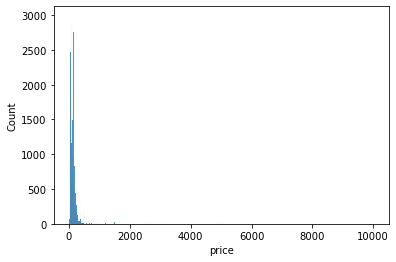

In [69]:
sns.histplot(data = airbnb.price)
plt.show()

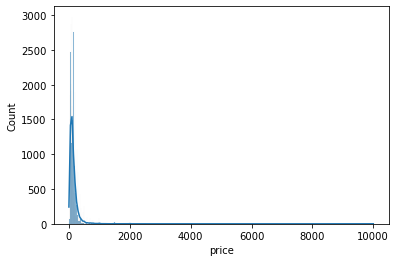

In [70]:
sns.histplot(data = airbnb.price,kde = True)
plt.show()

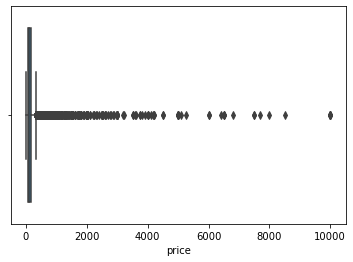

In [71]:
sns.boxplot(airbnb['price'])
plt.show()

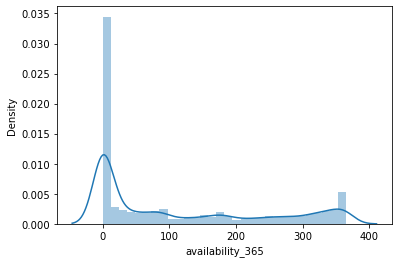

In [72]:
sns.distplot(airbnb['availability_365'])
plt.show()

### 7.8 availability_365

Uniform Distribution: The availability_365 variable shows a uniform distribution with values ranging from 0 to 370.

Right-Skewed: The distribution is slightly to moderately skewed to the right, as indicated by a skewness value between 0.1 and 0.5.

In [73]:
#skewness and kurtosis
print("Skewness: %f" % airbnb['availability_365'].skew())
print("Kurtosis: %f" % airbnb['availability_365'].kurt())

Skewness: 0.763408
Kurtosis: -0.997534


Platykurtic Distribution: The distribution appears flatter than a normal distribution, exhibiting platykurtosis. This is characterized by a negative kurtosis, indicating a lack of outliers.

### 7.9 minimum_nights

In [74]:
airbnb.minimum_nights.value_counts()

1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
186        1
366        1
68         1
87         1
36         1
Name: minimum_nights, Length: 109, dtype: int64

In [75]:
airbnb.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

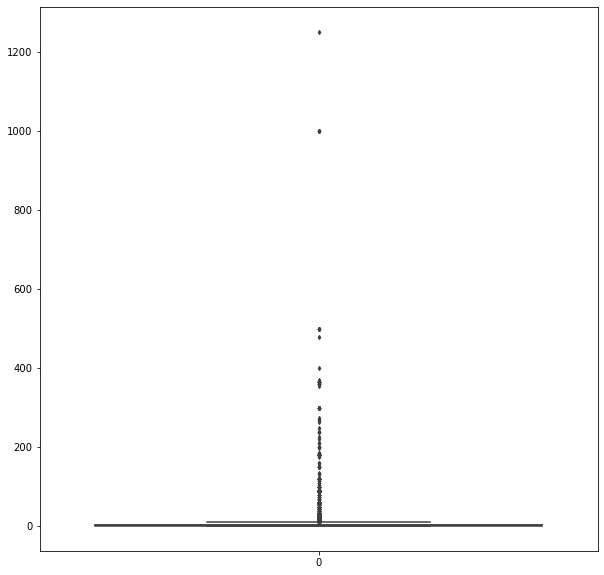

In [76]:
plt.figure(figsize=(10,10))
sns.boxplot(data = airbnb.minimum_nights,fliersize=3)
plt.show()

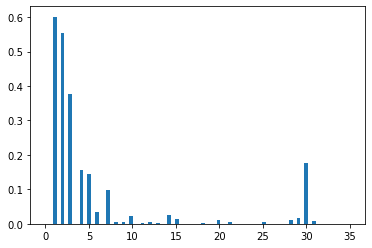

In [77]:
plt.hist(data = airbnb, x = 'minimum_nights',bins=80,range=(0,35),density=True)
plt.show()

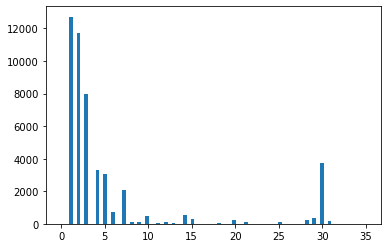

In [78]:
plt.hist(data = airbnb, x = 'minimum_nights',bins=80,range=(0,35))
plt.show()

### 7.10 number_of_reviews

In [79]:
airbnb.number_of_reviews.describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

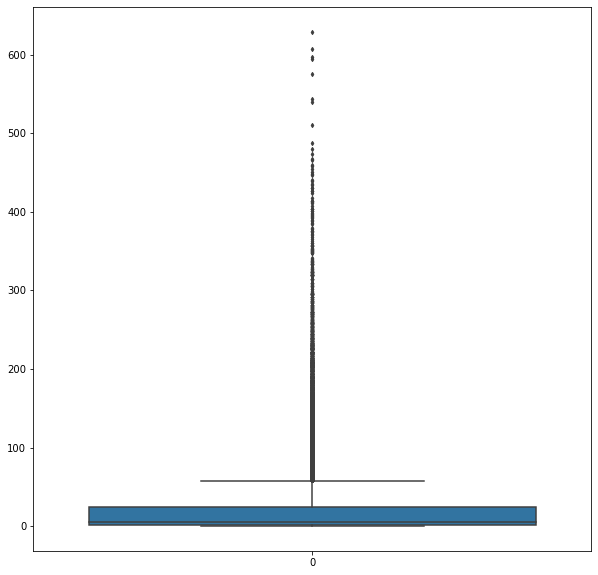

In [80]:
plt.figure(figsize=(10,10))
sns.boxplot(data = airbnb.number_of_reviews,fliersize=3)
plt.show()

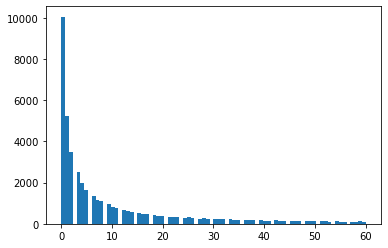

In [81]:
plt.hist(data = airbnb, x = 'number_of_reviews',bins=80,range=(0,60))
plt.show()

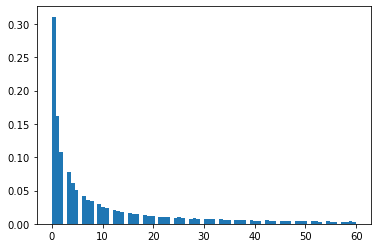

In [82]:
plt.hist(data = airbnb, x = 'number_of_reviews',bins=80,range=(0,60),density=True)
plt.show()

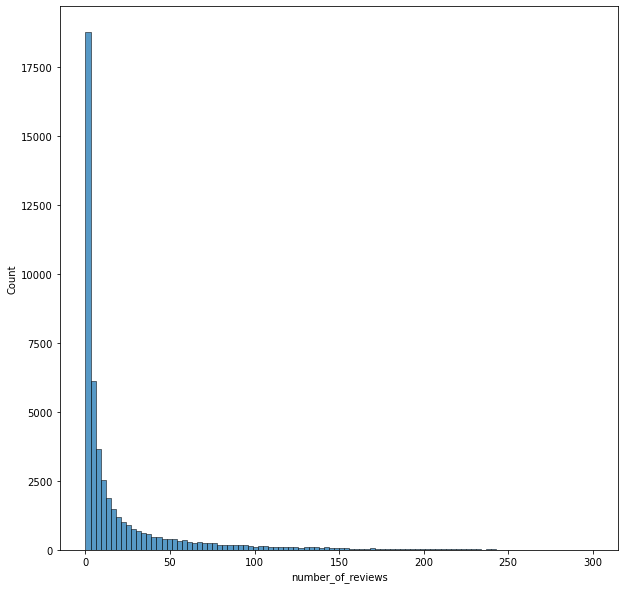

In [83]:
plt.figure(figsize = (10,10))
sns.histplot(data = airbnb, x = 'number_of_reviews',bins=100,binrange=(0,300))
plt.show()

### 7.11 reviews_per_month

In [84]:
airbnb.reviews_per_month.describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

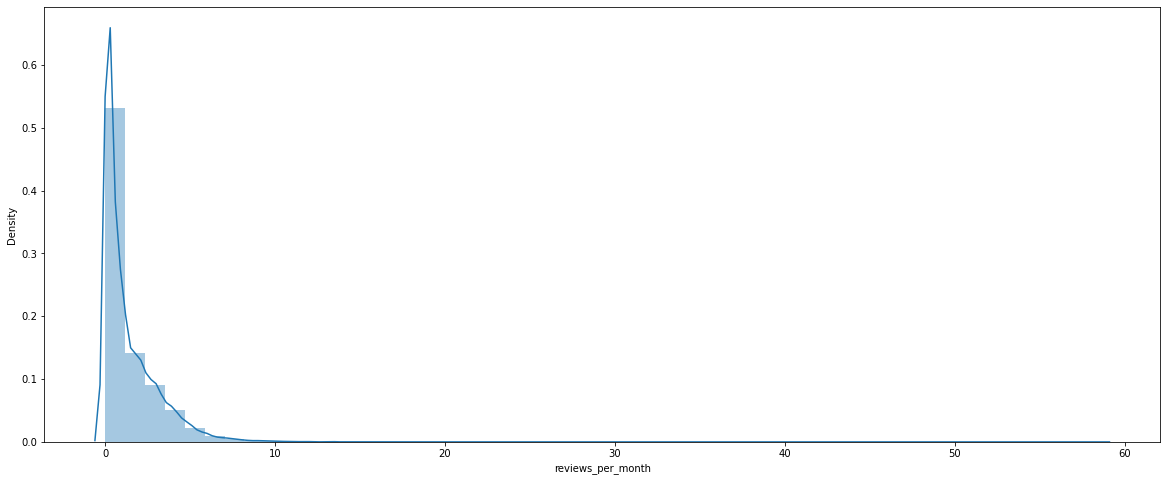

In [85]:
plt.figure(figsize = (20,8))
sns.distplot(airbnb['reviews_per_month'])
plt.show()

Looks the reviews_per_month is positively skewed(high) towards right with longer tails indicating the presence of outliers.

Moreover, from the two distribution we can infer that monthly reviews goes from 0-10 and it ranges till 60 at highest.

In [86]:
#skewness and kurtosis
print("Skewness: %f" % airbnb['reviews_per_month'].skew())
print("Kurtosis: %f" % airbnb['reviews_per_month'].kurt())

Skewness: 3.130189
Kurtosis: 42.493469


### 8. Bivariate and Multivariate Analysis

### 8.1 Finding the correalations

In [87]:
airbnb[numerical_columns].head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,149,1,9,0.21,6,365
1,225,1,45,0.38,2,355
2,150,3,0,NaN,1,365
3,89,1,270,4.64,1,194
4,80,10,9,0.10,1,0


In [88]:
airbnb[numerical_columns].corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


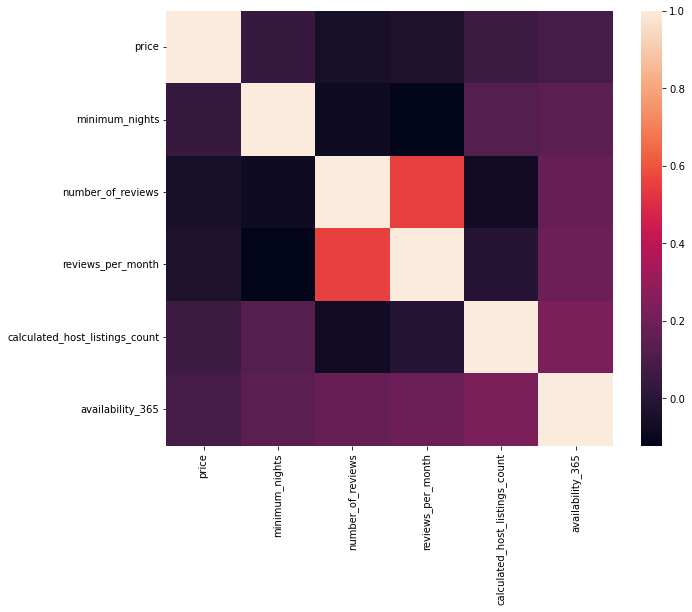

In [89]:
plt.figure(figsize=(10,8))
sns.heatmap(data = airbnb[numerical_columns].corr())
plt.show()

### 8.2 number_of_reviews_categories and prices

In [90]:
# prices for each of reviews_categories
x1 = airbnb.groupby('number_of_reviews_categories').price.sum().sort_values(ascending = False)
x1

number_of_reviews_categories
Low          4002323
very Low     1806531
High          971346
Medium        508647
very High     178431
Name: price, dtype: int64

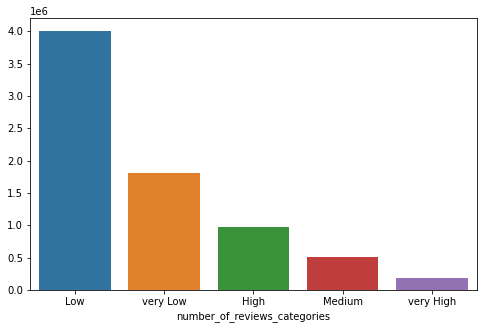

In [91]:
plt.figure(figsize=(8,5))
sns.barplot(x = x1.index,y = x1.values)
plt.show()

<AxesSubplot:xlabel='number_of_reviews_categories', ylabel='price'>

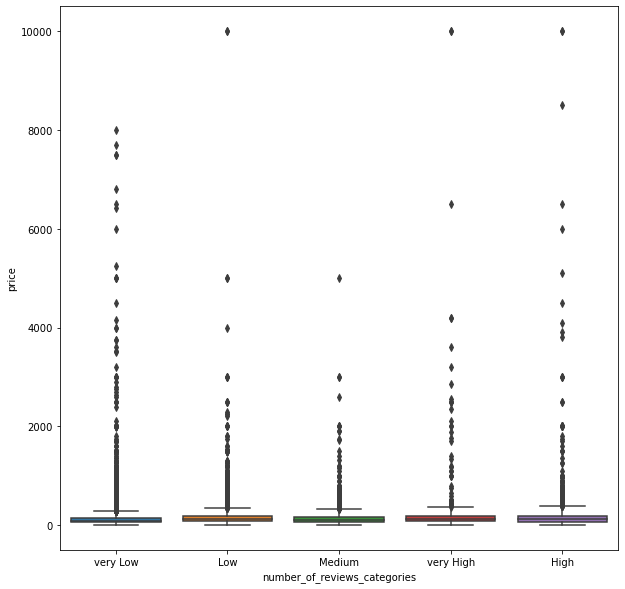

In [92]:
plt.figure(figsize=(10,10))
sns.boxplot(x = airbnb.number_of_reviews_categories , y = airbnb.price)

In [93]:
airbnb.groupby('number_of_reviews_categories').price.mean().sort_values()

number_of_reviews_categories
very Low     142.022877
Medium       145.203254
Low          153.746274
High         164.830477
very High    238.863454
Name: price, dtype: float64

In [94]:
airbnb.groupby('number_of_reviews_categories').price.median().sort_values()

number_of_reviews_categories
very Low      90.0
Medium       105.0
High         120.0
Low          120.0
very High    120.0
Name: price, dtype: float64

In [95]:
x2 = pd.DataFrame(x1)
x2 = x2.reset_index()
x2

,number_of_reviews_categories,price
0,Low,4002323
1,very Low,1806531
2,High,971346
3,Medium,508647
4,very High,178431


In [96]:
((x2.groupby('number_of_reviews_categories').price.sum()/x2.price.sum())*100).sort_values(ascending = True)

number_of_reviews_categories
very High     2.389505
Medium        6.811679
High         13.008033
very Low     24.192631
Low          53.598152
Name: price, dtype: float64

  What is the pricing ranges preferred by customers?
    
  The total price for 'Low' or 'very Low' number_of_reviews_categories are high.

### 8.3 ('room_type' and 'number_of_reviews_categories')

In [97]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,very High,very Low,very Low,very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,very High,very Low,very Low,very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,very High,Low,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-05-07,4.64,1,194,Medium,very Low,very Low,very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,very Low,very High,Medium,Medium


In [100]:
airbnb.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [98]:
pd.crosstab(airbnb['room_type'], airbnb['number_of_reviews_categories'])

number_of_reviews_categories,High,Low,Medium,very High,very Low
room_type,,,,,
Entire home/apt,3809,14909,1960,504,4227
Private room,1950,10769,1494,226,7887
Shared room,134,354,49,17,606


In [99]:
airbnb.groupby('room_type').number_of_reviews.sum() 

room_type
Entire home/apt    580403
Private room       538346
Shared room         19256
Name: number_of_reviews, dtype: int64

In [100]:
airbnb.groupby('room_type').number_of_reviews.sum()/airbnb.room_type.value_counts()

room_type
Entire home/apt    22.842418
Private room       24.112962
Shared room        16.600000
dtype: float64

The various kinds of properties that exist w.r.t. customer preferences.?

Entire home/apt have more reviews than Shared rooms

'Shared room' are less likey to give reviews. only 16 %

### 8.4 'room_type' and 'price_categories'

In [101]:
pd.crosstab(airbnb['room_type'], airbnb['price_categories'])

price_categories,High,Low,Medium,very High,very Low
room_type,,,,,
Entire home/apt,3714,13086,4262,120,4227
Private room,1620,9597,3170,52,7887
Shared room,113,315,124,2,606


### 8.5 'room_type' and 'reviews_per_month'

In [106]:
airbnb.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [102]:
airbnb.groupby('room_type').reviews_per_month.mean()

room_type
Entire home/apt    1.306578
Private room       1.445209
Shared room        1.471726
Name: reviews_per_month, dtype: float64

In [103]:
airbnb.groupby('room_type').reviews_per_month.median()

room_type
Entire home/apt    0.66
Private room       0.77
Shared room        0.98
Name: reviews_per_month, dtype: float64

In [104]:
airbnb.groupby('room_type').reviews_per_month.sum()

room_type
Entire home/apt    26565.34
Private room       25529.62
Shared room         1245.08
Name: reviews_per_month, dtype: float64

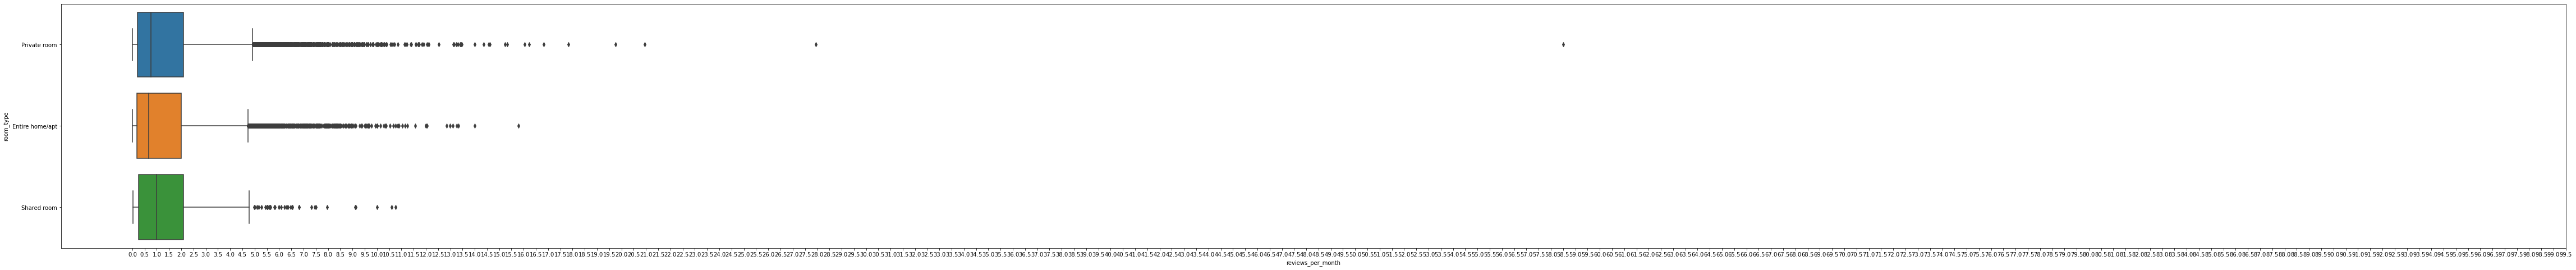

In [105]:
plt.figure(figsize=(80,8))
sns.boxplot(data = airbnb, y = 'room_type' ,x = 'reviews_per_month')
plt.xticks(np.arange(0,100,.5))
plt.show()

For each 'room_type' there are ~1.4 reviews per month on average.

### 8.6 minimum_night_categories and reviews_per_month

In [106]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,very High,very Low,very Low,very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,very High,very Low,very Low,very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,very High,Low,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-05-07,4.64,1,194,Medium,very Low,very Low,very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,very Low,very High,Medium,Medium


In [107]:
airbnb.groupby('minimum_night_categories').reviews_per_month.sum().sort_values()

minimum_night_categories
High          1227.57
very High     2235.19
Medium        4689.73
very Low     20395.49
Low          24792.06
Name: reviews_per_month, dtype: float64

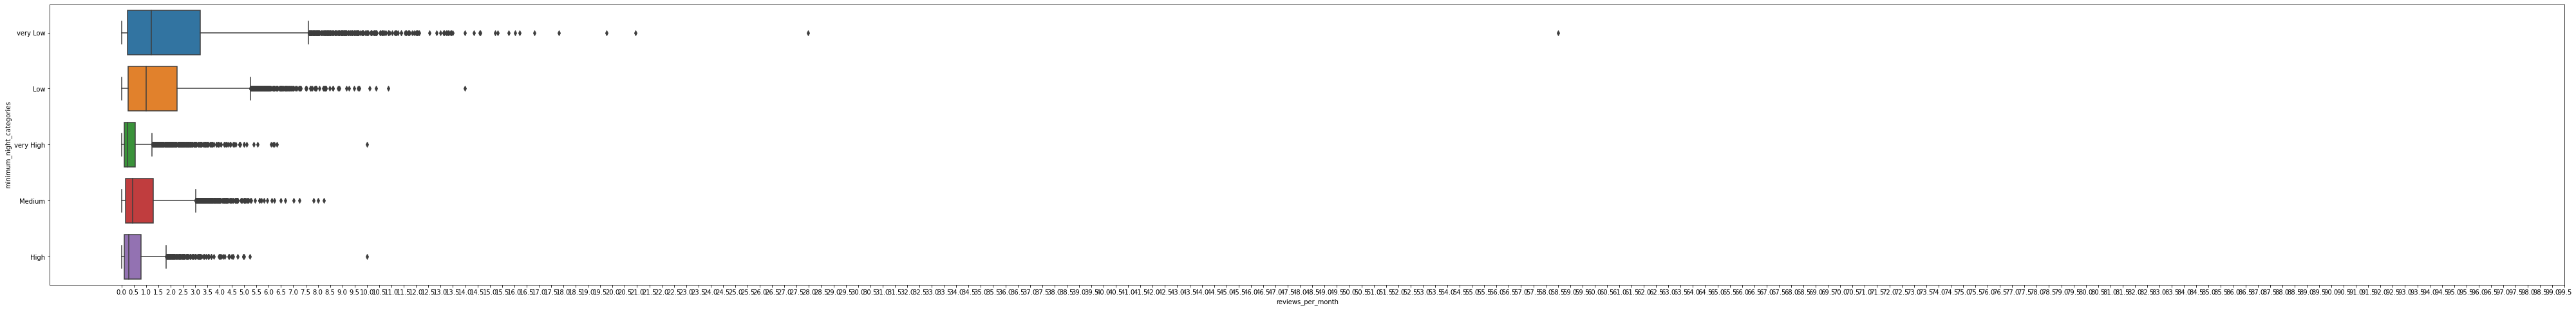

In [108]:
plt.figure(figsize=(70,8))
sns.boxplot(data = airbnb, y = 'minimum_night_categories' ,x = 'reviews_per_month')
plt.xticks(np.arange(0,100,.5))
plt.show()

Customer's are more likely to leave reviews for low number of minimum nights

Adjustments in the existing properties to make it more customer-oriented ?

minimum_nights should be on the lower side to make properties more customer-oriented

### 8.7 'availability_365_categories', 'price_categories' and 'reviews_per_month'

In [109]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,very High,very Low,very Low,very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,very High,very Low,very Low,very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,very High,Low,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-05-07,4.64,1,194,Medium,very Low,very Low,very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,very Low,very High,Medium,Medium


In [110]:
airbnb.availability_365_categories.value_counts()

very Low     17941
Low          11829
very High     8108
Medium        5792
High          5225
Name: availability_365_categories, dtype: int64

In [111]:
pd.DataFrame(airbnb.groupby(['availability_365_categories','price_categories']).reviews_per_month.mean())

reviews_per_month
availability_365_categories price_categories                   
High                        High                       0.598431
                            Low                        2.200373
                            Medium                     1.056111
                            very High                  0.342308
                            very Low                   3.289381
Low                         High                       0.638307
                            Low                        1.783956
                            Medium                     0.883844
                            very High                  0.803750
                            very Low                   2.896114
Medium                      High                       0.591070
                            Low                        1.993565
                            Medium                     1.157492
                            very High                  0.517500
                            very Low                   2.893918
very High                   High                       0.428464
                            Low                        1.490562
                            Medium                     0.694283
                            very High                  0.276571
                            very Low                   2.206077
very Low                    High                       0.337780
                            Low                        0.506051
                            Medium                     0.276970
                            very High                  0.480588
                            very Low                   0.673759

If the combination of availability and price is very high, reviews_per_month will be low on average.

Very high availability and very low price are likely to get more reviews.